In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import keras as keras
from keras.layers import Conv2D, MaxPooling2D, Dense, LSTM, Dropout
from keras.layers import Activation, BatchNormalization, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load and preprocess training and testing dataset

In [2]:
# Import training and testing dataset and save to the dataset_buffer

train_images_database, train_labels_database = tfds.as_numpy(tfds.load(
    'emnist/digits',
    split = 'train',
    shuffle_files = False,
    batch_size = -1,
    as_supervised = True,
))

test_images_database, test_labels_database = tfds.as_numpy(tfds.load(
    'emnist/digits',
    split = 'test',
    shuffle_files = False,
    batch_size = -1,
    as_supervised = True,
))

# plt.figure(1)
# img = train_images_database[2, :, :, :]
# plt.imshow(img)
# plt.show()

# Transport row/col of image
for img_index in range(0, train_images_database.shape[0]):
    for channel_index in range(0, train_images_database.shape[3]):
        train_images_database[img_index, :, :, channel_index] =  train_images_database[img_index, :, :, channel_index].transpose()
        
# Transport row/col of image
for img_index in range(0, test_images_database.shape[0]):
    for channel_index in range(0, test_images_database.shape[3]):
        test_images_database[img_index, :, :, channel_index] =  test_images_database[img_index, :, :, channel_index].transpose()

# plt.figure(2)
# img = train_images_database[2, :, :, :]
# plt.imshow(img)
# plt.show()
                  
num_classes = np.amax(train_labels_database);
total_train_image = train_images_database.shape[0];
total_test_image = test_images_database.shape[0];

# Make class numbering start at 0
train_labels_database = train_labels_database - 1
test_labels_database = test_labels_database - 1

img_rows = 28
img_cols = 28
img_channel = 1
input_shape = (img_rows, img_cols, img_channel)

train_images_database = train_images_database.reshape([train_images_database.shape[0], img_rows, img_cols, img_channel])
test_images_database = test_images_database.reshape([test_images_database.shape[0], img_rows, img_cols, img_channel])

# print(train_images_database.shape[0])
# print(test_images_database.shape[0])

## Load and process training and testing dataset

In [3]:
# Import training and testing from dataset_buffer
train_images = train_images_database
train_labels = train_labels_database

test_images = test_images_database
test_labels = test_labels_database

In [4]:
# Dataset preprocessing #1

# Transfer to nparray
train_images = train_images.astype('float32')
train_labels = to_categorical(train_labels, num_classes, dtype = 'float32')
test_images = test_images.astype('float32')
test_labels = to_categorical(test_labels, num_classes, dtype = 'float32')

In [5]:
# Dataset preprocessing #2(continue)

# Normalize
def thinning(image):
    tmp = np.where(image < 210.0, 0, image)
    return np.where(image < 210.0, 0, 255)

train_images = thinning(train_images)
train_images = (train_images - 128.0) / 128.0

test_images = thinning(test_images)
test_images = (test_images - 128.0) / 128.0

## Model define and create

In [6]:
# Model create #1
filter_x = 5;
filter_y = 5;

In [6]:



model=Sequential()
#Conv1
model.add(Conv2D(filters=32, 
                 kernel_size=(filter_x, filter_y), 
                 padding="same",  
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

#Conv2
model.add(Conv2D(filters=64, 
                 kernel_size=(filter_x, filter_y), 
                 padding="same", 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

#Conv3
model.add(Conv2D(filters=64, 
                 kernel_size=(filter_x, filter_y), 
                 padding="same", 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

In [7]:
# Model create #2(continue)

#FC1
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))

#FC2
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [8]:
# Show your model

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [9]:
model_lstm_2 = Sequential()
#Conv1
model_lstm_2.add(Conv2D(filters=32, 
                 kernel_size=(filter_x, filter_y), 
                 padding="same",  
                 input_shape=input_shape))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Activation("relu"))
model_lstm_2.add(MaxPooling2D())

#Conv2
model_lstm_2.add(Conv2D(filters=64, 
                 kernel_size=(filter_x, filter_y), 
                 padding="same", 
                 input_shape=input_shape))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Activation("relu"))
model_lstm_2.add(MaxPooling2D())

#Conv3
model_lstm_2.add(Conv2D(filters=64, 
                 kernel_size=(filter_x, filter_y), 
                 padding="same", 
                 input_shape=input_shape))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Activation("relu"))
model_lstm_2.add(MaxPooling2D())

#FC1
model_lstm_2.add(Flatten())
model_lstm_2.add(Dense(64))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Activation("relu"))

#LSTM1
model_lstm_2.add(LSTM(64, return_sequences=True))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Activation("relu"))

#FC2
model_lstm_2.add(Dense(num_classes))
model_lstm_2.add(Activation("softmax"))


ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)

In [ ]:
print(model_lstm_2.summary())

## Model training

In [9]:
# Training model

#Define optimizer loss function and merics 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set training
model.fit(train_images, train_labels,
          validation_split = 0.2,
          batch_size = 200,
          verbose = 1,
          epochs = 2
          )

Epoch 1/2
960/960 [==============================] - 131s 135ms/step - loss: 0.0704 - accuracy: 0.9820 - val_loss: 0.0425 - val_accuracy: 0.9877
Epoch 2/2
960/960 [==============================] - 131s 136ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0285 - val_accuracy: 0.9916


In [10]:
# Model Evaluation
score = model.evaluate(test_images, test_labels, verbose = 0)

print('test loss', score[0])
print('accuracy', score[1])


test loss 0.028249870985746384
accuracy 0.9909999966621399


#Save weights of this model  
model.save_weights('my_model.h5')

#load weights to this TensorFlow model  
model.load_weights('my_model.h5')

In [11]:
# Save model and weights of this model
model.save('emnist_model.h5')

In [12]:
# lOAD model and weights of this model
model_2 = keras.models.load_model('emnist_model.h5')

# Model Evaluation
score = model_2.evaluate(test_images, test_labels, verbose = 0)
print('test loss', score[0])
print('accuracy', score[1])

test loss 0.028249870985746384
accuracy 0.9909999966621399


In [13]:
model = model_2

---------------------------------------------------------------------------------------------------------------------

## Reload and preprocess images in TFLM

In [14]:
# Import training and testing from dataset_buffer
test_images = test_images_database
test_labels = test_labels_database

def thinning(image):
    return np.where(image < 210.0, 0, 255)

test_images = thinning(test_images)
test_images = (test_images - 128.0) / 128.0

## Convert model into TFLM format

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

In [16]:
test_images = tf.cast(test_images, tf.float32)
tf_lite_ds = tf.data.Dataset.from_tensor_slices((test_images)).batch(1) #construct a dataset 

def representative_data_gen():
    for input_value in tf_lite_ds.take(100):
        yield [input_value]
    
converter.representative_dataset = representative_data_gen

In [17]:
import pathlib

converted_model = converter.convert()

generated_dir = pathlib.Path("generated/")
generated_dir.mkdir(exist_ok=True, parents=True)
converted_model_file = generated_dir/"emnist_model_int8.tflite"
converted_model_file.write_bytes(converted_model)

INFO:tensorflow:Assets written to: C:\Users\hiban\AppData\Local\Temp\tmpw1acb7w8\assets


INFO:tensorflow:Assets written to: C:\Users\hiban\AppData\Local\Temp\tmpw1acb7w8\assets
C:\Users\hiban\AppData\Roaming\Python\Python311\site-packages\tensorflow\lite\python\convert.py:789: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


202128

In order to integrate converted model into TFLM application we have to save it as a C array. One way to do that is to use **xxd** utility available on Linux or in Cygwin/MinGW terminals on Windows. Open terminal and run following commands:

```
cd generated/
xxd -i emnist_model_int8.tflite > model.h
```

The model is ready to be integrated into TFLM application.

## Evaluate TensorFlow Lite INT-8 Model

Full test set contains 14800 samples. Evaluating int8 model on it might take more than 10 minutes. 
If you want to get estimation faster, please, limit number of samples to be evaluated by reducing **max_samples** value

In [18]:
max_samples = int(test_images_database.shape[0] * 0.20)
# max_samples = int(test_images_database.shape[0] * 1.00)

print(max_samples)

8000


In [19]:
# import pathlib

generated_dir = pathlib.Path("generated/")
generated_dir.mkdir(exist_ok=True, parents=True)
converted_model_file = generated_dir/"emnist_model_int8.tflite"

interpreter = tf.lite.Interpreter(model_path=str(converted_model_file))
interpreter.allocate_tensors()

# A helper function to evaluate the TF Lite model using "test" dataset.
def evaluate_model(interpreter):
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]
    scale, zero_point = interpreter.get_output_details()[0]['quantization']

    prediction_values = []
    
    for tflm_test_image in tflm_test_images[:max_samples]:
        # Pre-processing: add batch dimension, quantize and convert inputs to int8 to match with
        # the model's input data format.
        tflm_test_image = np.expand_dims(tflm_test_image, axis=0) #.astype(np.float32)
        tflm_test_image = np.int8(tflm_test_image / scale + zero_point)
        interpreter.set_tensor(input_index, tflm_test_image)

        interpreter.invoke()

        # Find the letter with highest probability
        output = interpreter.tensor(output_index)
        result = np.argmax(output()[0])
        prediction_values.append(result)
    
    accurate_count = 0
    for index in range(len(prediction_values)):
        if prediction_values[index] == ans_test_labels[index]:
            accurate_count += 1
    accuracy = accurate_count * 1.0 / len(prediction_values)

    return accuracy * 100

In [20]:
# Import training and testing from dataset_buffer
tflm_test_images = test_images_database
ans_test_labels = test_labels_database

def thinning(image):
    return np.where(image < 210.0, 0, 255)

tflm_test_images = thinning(tflm_test_images)
tflm_test_images = (tflm_test_images - 128.0) / 128.0

Please, keep in mind that full test dataset evaluation on int8 model may take several minutes. 

In [21]:
print(str(evaluate_model(interpreter)) + "%")

89.325%


Evaluate the accuracy without normalizing data

In [22]:
# Import training and testing from dataset_buffer
tflm_test_images = test_images_database
ans_test_labels = test_labels_database

tflm_test_images = (tflm_test_images - 128.0) / 128.0

In [23]:
print(str(evaluate_model(interpreter)) + "%")

87.375%


-----

## Create a test set for target application

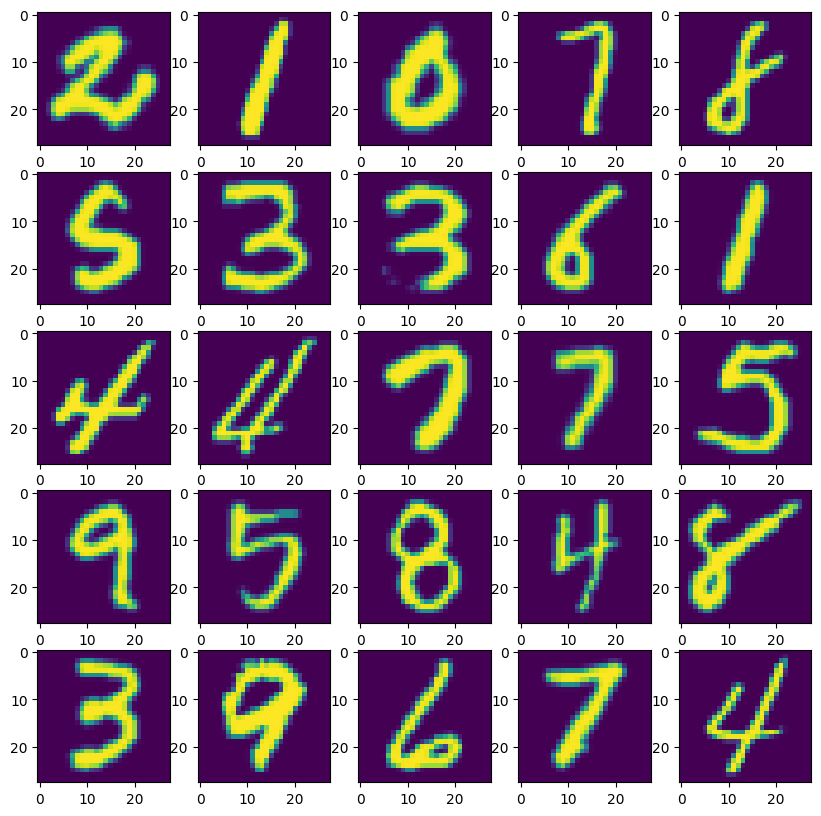

In [24]:
import random

# Import training and testing from dataset_buffer
test_images = test_images_database
test_labels = test_labels_database

test_images = test_images.reshape([test_images.shape[0], img_rows, img_cols, img_channel])

num_of_samples = 25
random_test_images = random.sample(range(1, test_images.shape[0]), num_of_samples)

fig=plt.figure(figsize=(10, 10))
rows = 5
cols = 5

for index in range(0, num_of_samples):
    img = test_images[random_test_images[index]]
    fig.add_subplot(rows, cols, (index + 1))
    plt.imshow(img)

plt.show()


In [25]:
samples_file = open("generated/test_samples.cpp", "w")

samples_file.write("#include \"test_samples.h\"\n\n")
samples_file.write("const int kNumSamples = " + str(num_of_samples) + ";\n\n")

samples = "" 
samples_array = "const TestSample test_samples[kNumSamples] = {"

for sample_idx, img_idx in enumerate(random_test_images, 1):
    img_arr = list(np.ndarray.flatten(test_images[img_idx]))
    var_name = "sample" + str(sample_idx)
    samples += "TestSample " + var_name + " = {\n" #+ "[IMAGE_SIZE] = { "
    samples += "\t.label = " + str(test_labels[img_idx]) + ",\n" 
    samples += "\t.image = {\n"
    wrapped_arr = [img_arr[i:i + 20] for i in range(0, len(img_arr), 20)]
    for sub_arr in wrapped_arr:
        samples += "\t\t" + str(sub_arr)
    samples += "\t}\n};\n\n"    
    samples_array += var_name + ", "
    
samples = samples.replace("[", "")
samples = samples.replace("]", ",\n")
samples_array += "};\n"

samples_file.write(samples);
samples_file.write(samples_array);
samples_file.close()

## Done

You have converted a Tensorflow model into TFLM format and generated a test set for the application. Now you can copy generated files into target application of this tutorial and try it out:

In order to integrate converted model into TFLM application we have to save it as a C array. One way to do that is to use **xxd** utility available on Linux or in Cygwin/MinGW terminals on Windows. Open terminal and run following commands:

```
cd generated/
xxd -i emnist_model_int8.tflite > model.h
```

The model is ready to be integrated into TFLM application.

* copy *generated/model.h* to *../inc* and *generated/test_samples.cpp* to *../src*
* You can start to integrate your WE-I project